# Bibliotecas a serem utilizadas:

In [ ]:
import matplotlib.pyplot as plt  #Visualização de dados
import numpy as np
import seaborn as sns
import pandas as pd  #Manipular database
from sklearn.model_selection import train_test_split  #Divisor database
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix  #Acurácia dos resultados

# Dataset:

Através da biblioteca pandas, iremos importar os dados que serão utilizados.

In [ ]:
dataset = pd.read_csv("mushroom_data.csv")       # Arquivo com os números que representa a inicial de cada característica do cogumelo
datasetEx = pd.read_csv("mushroomEx_data.csv")   # Arquivo com o nome de cada característica do cogumelo

In [ ]:
dataset  # As letras estão sendo representadas de 1 até 26, sendo 1 = a, 2 = b, ..., 26 = z
         # isso foi feito para que seja possível utilizar no algoritmo de Naive Bayes

,classe,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,16,24,19,14,20,16,6,3,14,11,...,19,23,23,16,23,15,16,11,19,21
1,5,24,19,25,20,1,6,3,2,11,...,19,23,23,16,23,15,16,14,14,7
2,5,2,19,23,20,12,6,3,2,14,...,19,23,23,16,23,15,16,14,14,13
3,16,24,25,23,20,16,6,3,14,14,...,19,23,23,16,23,15,16,11,19,21
4,5,24,19,7,6,14,6,23,2,11,...,19,23,23,16,23,15,5,14,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,11,19,14,6,14,1,3,2,25,...,19,15,15,16,15,15,16,2,3,12
8120,5,24,19,14,6,14,1,3,2,25,...,19,15,15,16,14,15,16,2,22,12
8121,5,6,19,14,6,14,1,3,2,14,...,19,15,15,16,15,15,16,2,3,12
8122,16,11,25,14,6,25,6,3,14,2,...,11,23,23,16,23,15,5,23,22,12


In [ ]:
datasetEx

,classe,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Dentre esses atributos informados anteriormente, iremos utilizar apenas os seguintes para utilizar no **Classificador Ingênuo de Bayes**:

* **Formato do chapéu:** sino, cônico, convexo, plano, com saliência, afundado
* **Superfície do chapéu:** fibroso, com sulcos, escamoso, liso
* **Cor do chapéu:** marrom, amarelo claro, cor de canela, cinza, verde, rosa, roxo, vermelho, branco amarel
* **Marcas?:** marcas, não
* **Cor da lamela:** preta, marrom, amarelo claro, chocolate, cinza, laranja, rosa, roxa, vermelha, branca, amarela
* **Cor da estipe:** marrom, amarelado, cor de canela, cinza, laranja, rosa, vermelho, branco, amarelo
* **População:** abundante, agrupado, numeroso, disperso, amontoado, solitário
* **Habitat:** gramíneas, folhas, prados, passagens, ambiente urbano, resíduos orgânicos, bosques

Esses atributos foram considerados os essenciais para poder diferenciar cada tipo de cogumelo e isso é o ideal para o nosso projeto.

# Análise de dados

## Resumo dos dados

* Formato do chapéu

In [ ]:
datasetEx['cap-shape'].describe()

count     8124
unique       6
top          x
freq      3656
Name: cap-shape, dtype: object

* Superfície do chapéu

In [ ]:
datasetEx['cap-surface'].describe()

count     8124
unique       4
top          y
freq      3244
Name: cap-surface, dtype: object

* Cor do chapéu

In [ ]:
datasetEx['cap-color'].describe()

count     8124
unique      10
top          n
freq      2284
Name: cap-color, dtype: object

* Marcas

In [ ]:
datasetEx['bruises'].describe()

count     8124
unique       2
top          f
freq      4748
Name: bruises, dtype: object

* Cor da lamela

In [ ]:
datasetEx['gill-color'].describe()

count     8124
unique      12
top          b
freq      1728
Name: gill-color, dtype: object

* Cor da estipe

In [ ]:
datasetEx['stalk-color-above-ring'].describe()

count     8124
unique       9
top          w
freq      4464
Name: stalk-color-above-ring, dtype: object

* População

In [ ]:
datasetEx['population'].describe()

count     8124
unique       6
top          v
freq      4040
Name: population, dtype: object

* Habitat

In [ ]:
datasetEx['habitat'].describe()

count     8124
unique       7
top          d
freq      3148
Name: habitat, dtype: object

## Visualização gráfica dos atributos

### Mapa de calor

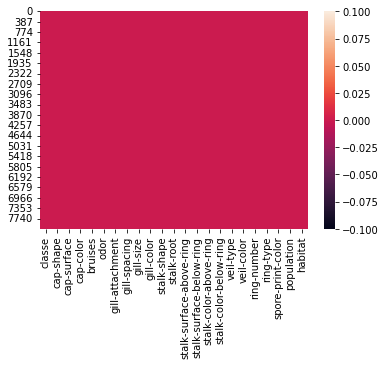

In [ ]:
sns.heatmap(dataset.isnull());

## Distribuição dos dados

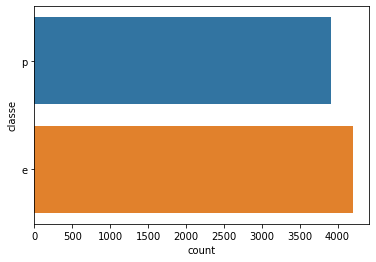

In [ ]:
sns.countplot(y='classe', data=datasetEx,) 
plt.show()

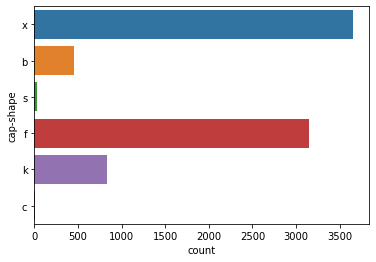

In [ ]:
sns.countplot(y='cap-shape', data=datasetEx,) 
plt.show()

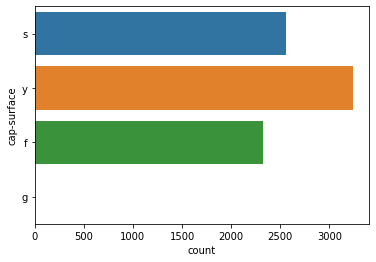

In [ ]:
sns.countplot(y='cap-surface', data=datasetEx,) 
plt.show()

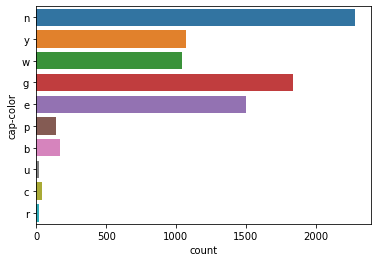

In [ ]:
sns.countplot(y='cap-color', data=datasetEx,) 
plt.show()

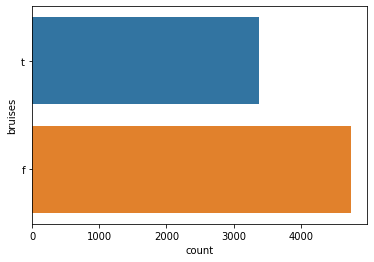

In [ ]:
sns.countplot(y='bruises', data=datasetEx,) 
plt.show()

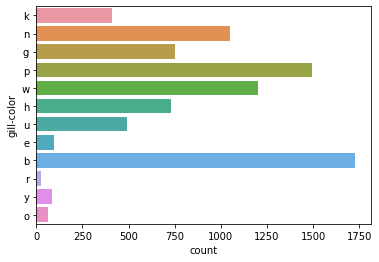

In [ ]:
sns.countplot(y='gill-color', data=datasetEx,) 
plt.show()

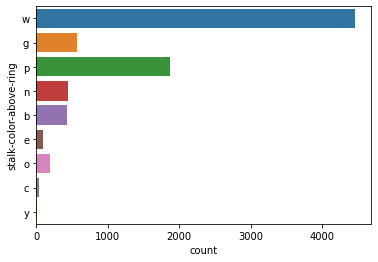

In [ ]:
sns.countplot(y='stalk-color-above-ring', data=datasetEx,) 
plt.show()

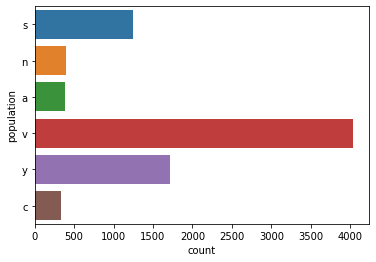

In [ ]:
sns.countplot(y='population', data=datasetEx,) 
plt.show()

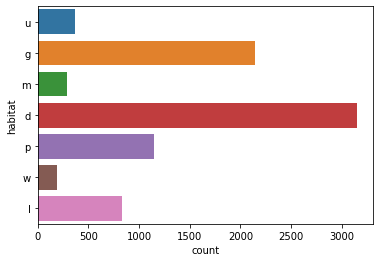

In [ ]:
sns.countplot(y='habitat', data=datasetEx,) 
plt.show()

### Tabela de correlação de dados

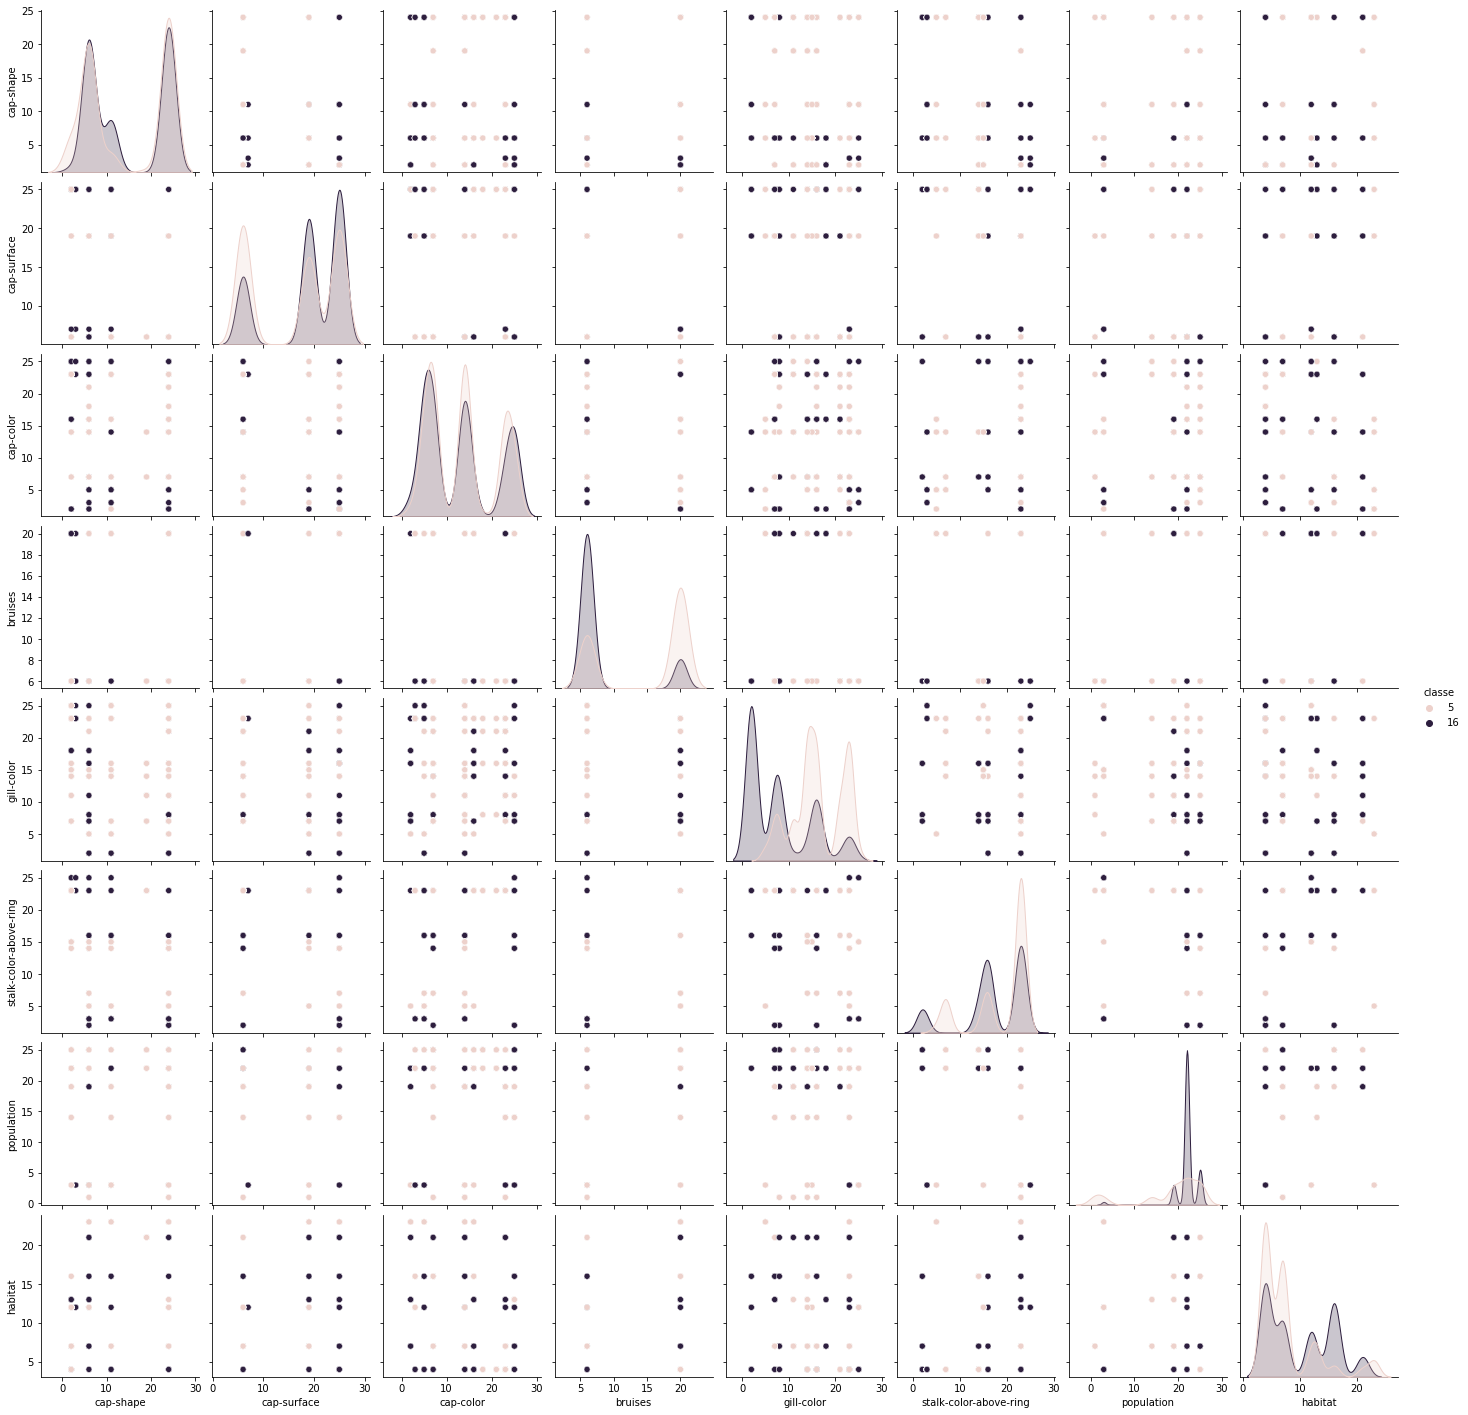

In [ ]:
correlation_Data = dataset.drop(['odor','gill-attachment','gill-spacing','gill-size','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color'], axis = 1)
sns.pairplot(correlation_Data, hue='classe')

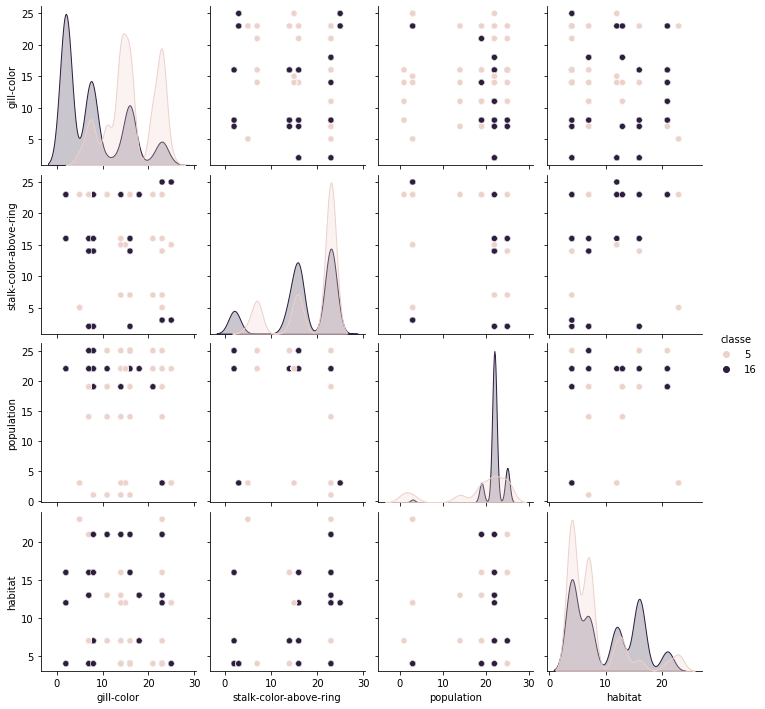

In [ ]:
correlation_Data1 = dataset.drop(['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color'], axis = 1)
sns.pairplot(correlation_Data1, hue='classe')

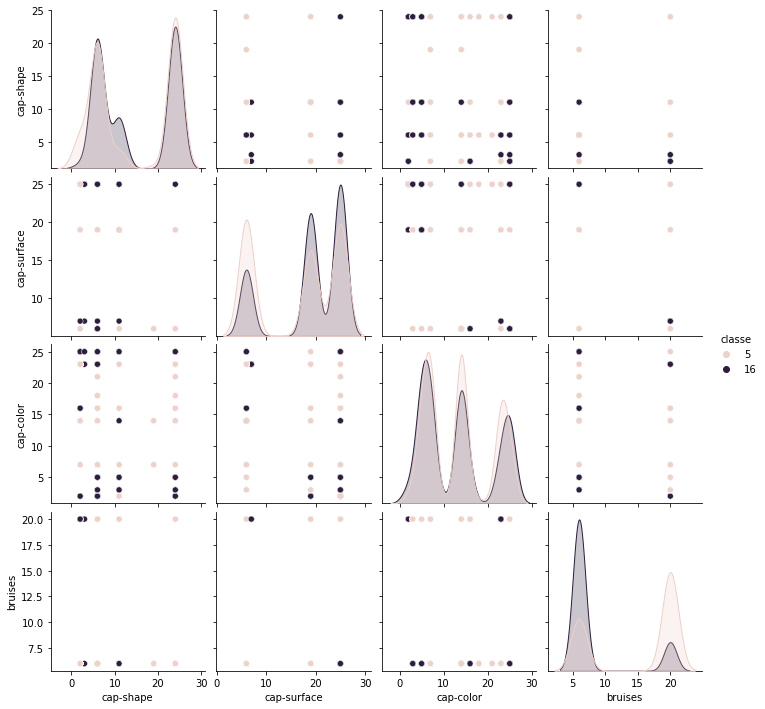

In [ ]:
correlation_Data2 = dataset.drop(['gill-color','stalk-color-above-ring','population','habitat','odor','gill-attachment','gill-spacing','gill-size','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color'], axis = 1)
sns.pairplot(correlation_Data2, hue='classe')

# Algoritmo Ingênuo de Bayes

## Treinamento

Aqui iremos dividir os dados em: 70% para treino e 30% para teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, dataset.classe,
                                                    test_size=0.3, random_state=21)

Demonstração de que foi dividido de maneira correta:

In [ ]:
x_train.shape

(5686, 23)

In [ ]:
x_test.shape

(2438, 23)

Por último, executar o algoritmo de Naive Bayes:

In [ ]:
naive = MultinomialNB()
naive.fit(x_train, y_train)
naive.score(x_test, y_test)

0.9479081214109926

In [ ]:
naive.class_count_

array([2940., 2746.])

## Previsão do classificador

In [ ]:
preview = naive.predict(x_test)
print(preview)

[ 5  5 16 ...  5  5 16]


## Tabela de confusão

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix(y_test, preview) #Gerando a matriz de confusão

array([[1231,   37],
       [  90, 1080]])

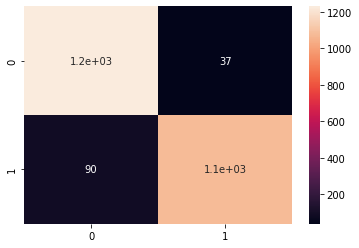

In [ ]:
map = confusion_matrix(y_test, preview) #Gerando a matriz de confusão
sns.heatmap(map,annot=True)

## Segundo teste

Neste segundo teste iremos inverter a proporção dos dados destinados a treinamentos e testes com o objetivo de comparar a acurácia do algoritmo. Sendo assim, teremos 30% para treino e 70% para testes:

In [ ]:
naive2 = MultinomialNB()
naive2.fit(x_test, y_test)
preview = naive.predict(x_train)
print(preview)

[ 5 16  5 ... 16 16 16]


### Tabela de confusão

In [ ]:
confusion_matrix(y_train, preview)

array([[2833,  107],
       [ 221, 2525]])

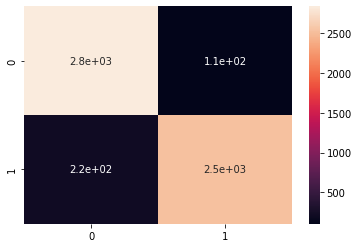

In [ ]:
map2 = confusion_matrix(y_train, preview)
sns.heatmap(map2,annot=True)

In [ ]:
naive2.score(x_train, y_train)

0.9461836088638762

Com isso, temos que a acurácia do segundo exemplo fica muito próxima ao do primeiro, sendo assim, temos um bom resultado pelo algoritmo.